# 1. Importing libararies

In [2]:

import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)

# 2. Data Understanding

In [3]:
#loading the dataset

Lead_df=pd.read_csv("Leads.csv")
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking shape of the dataset
Lead_df.shape

(9240, 37)

In [5]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 3. Data Cleaning

In [7]:
#checking unique values in the columns
Lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

 - Prospect Id and Lead number serves the same purpose so dropping Prospect Id

In [8]:
Lead_df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [9]:
round(100*(Lead_df.isnull().sum()/len(Lead_df.index)), 2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
#dropping variables having more than 40% null values

for i in Lead_df.columns:
    if((100*(Lead_df[i].isnull().sum()/len(Lead_df.index))) >= 40):
        Lead_df.drop(i, 1, inplace = True)

In [11]:
#checking if the columns have dropped
Lead_df.shape

(9240, 30)

In [12]:
#checking again for null values 

round(100*Lead_df.isnull().sum()/Lead_df.shape[0],2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


 - As can be seen, that **Select** is present in many columns which implies nothing, so will replace it will NaN to not to get confused.

In [14]:
Lead_df=Lead_df.replace('Select',np.NaN)


In [15]:
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


In [16]:
Lead_df.drop(['Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque','Magazine'],axis=1,inplace=True)
Lead_df.shape

(9240, 26)

In [17]:

round(100*Lead_df.isnull().sum()/Lead_df.shape[0],2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [18]:
# These columns still have null values so we will check these columns individually and see what can be done.
# Country,Specialization,How did you hear about X Education ,What is your current occupation, What matters most to you in choosing a course 

In [19]:
# checking attributes in categorical coloumns

Lead_df['Country'].value_counts(normalize=True,dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

 - India and Nan combine will give you 97% of the distribution.So, its safe to drop this column.
    

In [20]:
Lead_df.drop(['Country'],axis=1,inplace=True)
Lead_df.shape

(9240, 25)

In [21]:
Lead_df['How did you hear about X Education'].value_counts(normalize=True,dropna=False)*100

NaN                      78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

 - 78% null values are there so better to drop this column.
    

In [22]:
Lead_df.drop(['How did you hear about X Education'],axis=1,inplace=True)
Lead_df.shape

(9240, 24)

In [23]:
#What is your current occupation column


Lead_df['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [24]:
Lead_df['What is your current occupation']=Lead_df['What is your current occupation'].fillna('Unemployed')

In [25]:
Lead_df['What is your current occupation']=Lead_df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Other')

In [26]:
Lead_df['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.367965
Name: What is your current occupation, dtype: float64

In [27]:
#Specialization column

Lead_df['Specialization'].value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [28]:
Lead_df['Specialization']=Lead_df['Specialization'].fillna('Not given')


In [29]:
Lead_df['Specialization']=Lead_df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],"Management_courses")

Lead_df['Specialization']=Lead_df['Specialization'].replace(['Business Administration','E-Business','International Business','Rural and Agribusiness'],'Business_courses')

Lead_df['Specialization']=Lead_df['Specialization'].replace(['Banking, Investment And Insurance','Travel and Tourism','E-COMMERCE','Services Excellence'],'Industry_courses')

In [30]:
Lead_df['Specialization'].value_counts(normalize=True,dropna=False)*100

Management_courses       46.028139
Not given                36.580087
Business_courses          7.694805
Industry_courses          7.500000
Media and Advertising     2.196970
Name: Specialization, dtype: float64

In [31]:
#What matters most to you in choosing a course

Lead_df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [32]:
Lead_df['What matters most to you in choosing a course']=Lead_df['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [33]:
#Lead Profile

Lead_df['Lead Profile'].value_counts(normalize=True,dropna=False)*100

NaN                            74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

In [34]:
Lead_df.drop(['Lead Profile'],axis=1,inplace=True)

In [35]:
# City column

Lead_df['City'].value_counts(normalize=True,dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [36]:
Lead_df['City']=Lead_df['City'].fillna('Not given')


In [37]:
Lead_df['City']=Lead_df["City"].replace(['Thane & Outskirts',"Other Cities of Maharashtra"],"Maharastra_cities")

In [38]:
Lead_df['City'].value_counts(normalize=True,dropna=False)*100

Not given             39.707792
Mumbai                34.870130
Maharastra_cities     13.084416
Other Cities           7.424242
Other Metro Cities     4.112554
Tier II Cities         0.800866
Name: City, dtype: float64

In [39]:
round(100*Lead_df.isnull().sum()/Lead_df.shape[0],2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

 - we still have missing values which are around 1%

In [40]:
#Last Activity

Lead_df['Last Activity'].value_counts(normalize=True,dropna=False)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [41]:
Lead_df['Last Activity']=Lead_df['Last Activity'].replace(np.NaN,'Others')
Lead_df['Last Activity']=Lead_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Visited Booth in Tradeshow','Resubscribed to emails','Email Marked Spam'],'Others')

In [42]:
Lead_df['Last Activity'].value_counts(normalize=True,dropna=False)*100

Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Others                        3.333333
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [43]:
round(100*Lead_df.isnull().sum()/Lead_df.shape[0],2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [44]:
Lead_df=Lead_df.dropna()
Lead_df.shape

(5747, 23)

In [45]:
round(100*Lead_df.isnull().sum()/Lead_df.shape[0],2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Receive More Updates About Our Courses        

# 4. Conversion Ratio

In [46]:
# Checking Conversion Ratio


Conversion_ratio= sum(Lead_df['Converted'])/len(Lead_df['Converted'].index)*100
Conversion_ratio

45.50200104402297

#### Conversion_rate at the start is 45.5%

 - Now, we have manage to handle null values, lets get started with EDA.
    

# 5. Exploratory Data Analysis

In [47]:
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not given,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Not given,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not given,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Not given,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business_courses,Student,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not given,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [48]:

cat_cols=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Search','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','City','A free copy of Mastering The Interview','Last Notable Activity']
con_cols=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

## 5.1 Univariate Anlaysis 

Lead Origin


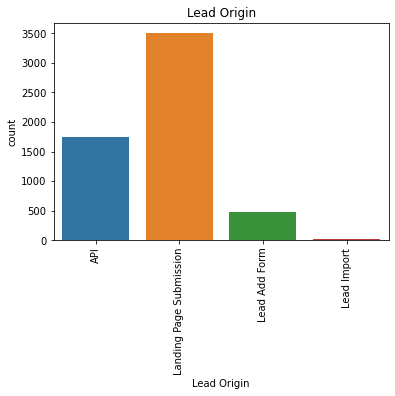

Lead Source


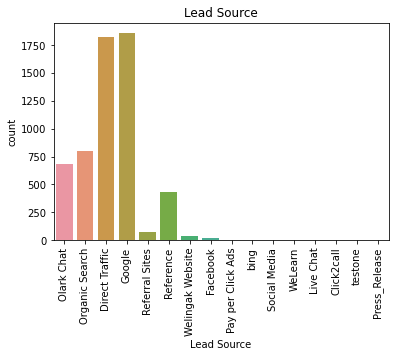

Do Not Email


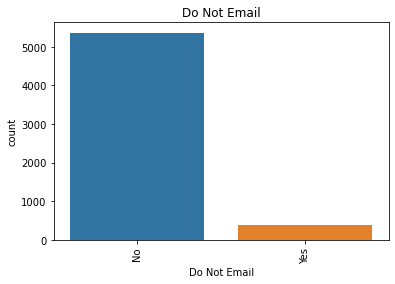

Do Not Call


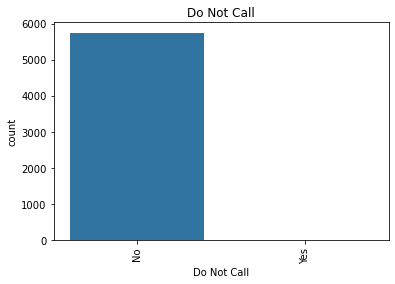

Last Activity


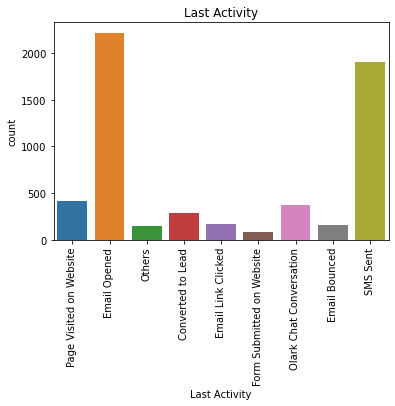

Specialization


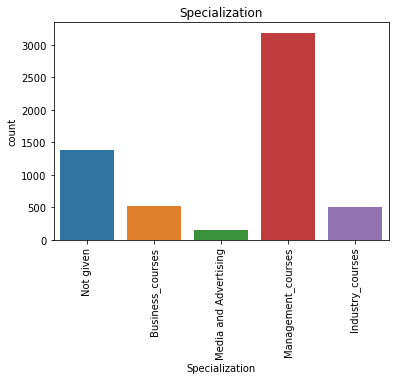

What is your current occupation


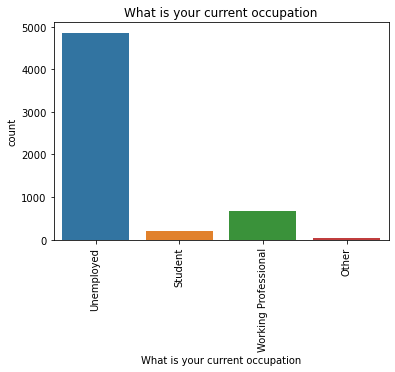

What matters most to you in choosing a course


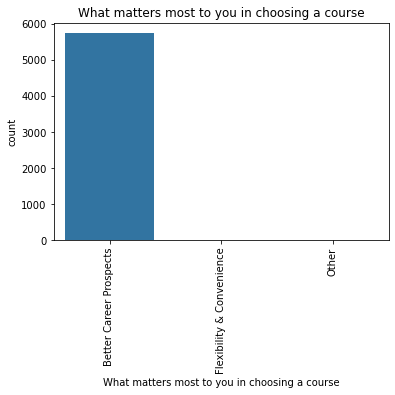

Search


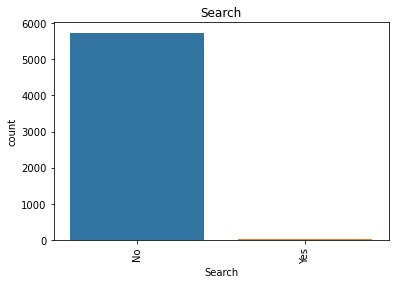

X Education Forums


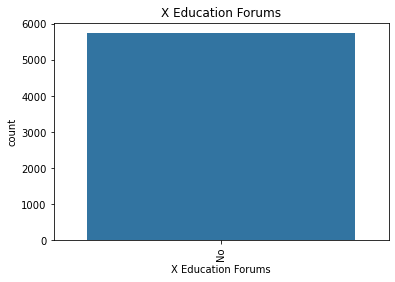

Newspaper


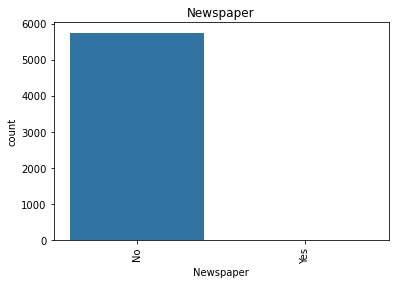

Digital Advertisement


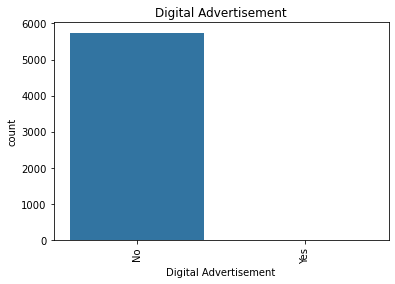

Through Recommendations


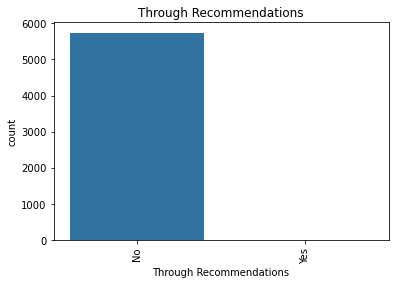

Receive More Updates About Our Courses


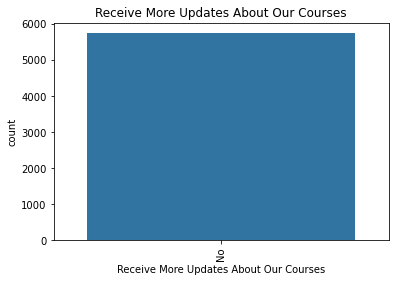

City


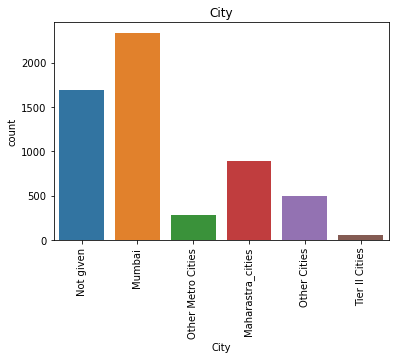

A free copy of Mastering The Interview


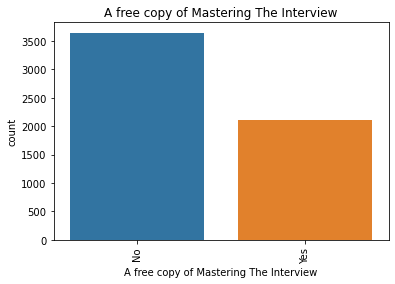

Last Notable Activity


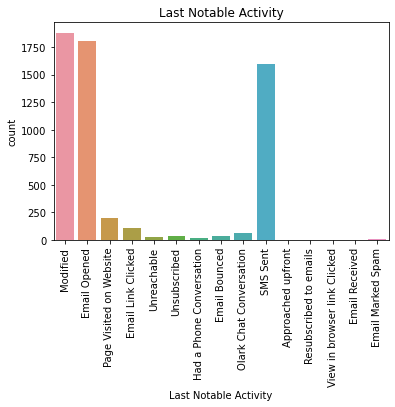

In [49]:
#categorical colums

for i in cat_cols:
    print(i)
    sns.countplot(Lead_df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

**Inference:**
1. Lead origin is mostly **landed on the page submission** than API.
2. Majority of the **leads** are from **GOOGLE**, then direct traffic , Olark Chat and organic engines.
3. Most people said **NO** to **email** and **calls**.
4. **Email opened** was the **highest activity** performed by a customer then SMS sent comes after it.
5. **Management courses** are more in demand and after that customer haven't specified the specialization.
6. **Unemployed** tops in occupation  **working professional** comes afterwards.
7. **Better Career Prospects** matters most to the customers **who wants to choose a course**.
8. Big **NO** to **search , Education forums, Newspaper, Digital advertisement**.
9. **No one** has come through **recommendations**.
10. **No one** wants to **receive updates about the courses**.
11. **Most people** have not mentioned their  **City**, after that  **Mumbai** comes in the list.
12. **No* to **A free copy of Mastering The Interview**.
13. **Modified, email opened and sms sent** was the **Last Notable Activity** for most of the customers.

## 5.2 Checking outliers of continuous columns

Converted


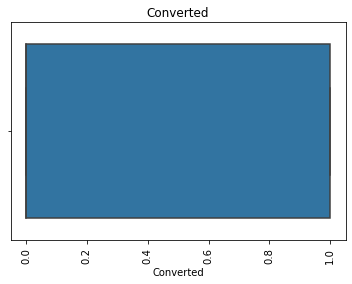

TotalVisits


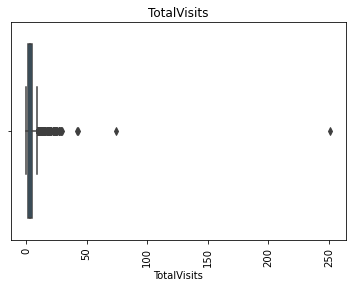

Total Time Spent on Website


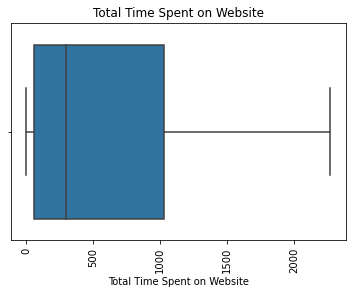

Page Views Per Visit


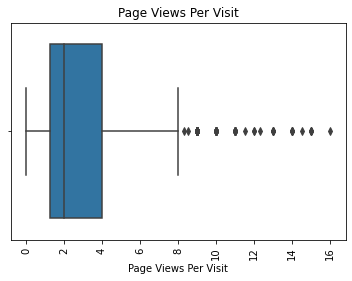

In [50]:
#continuous columns

for i in con_cols:
    print(i)
    sns.boxplot(Lead_df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

**Inference:**
 As we can see from box plot of continuous columns there are no such ouliers present in the data.Though 'total visits' and 'Page Views Per Visit' has some outliers.

    

## 5.3 Outliers Treatment

In [51]:
#Treating outliers in 'total visits' and 'Page Views Per Visit' cols.

#different levels of percentiles

Lead_df[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,5747.000000,5747.000000
mean,3.727336,2.579245
std,4.907139,2.062009
min,0.000000,0.000000
5%,0.000000,0.000000
25%,2.000000,1.250000
50%,3.000000,2.000000
75%,5.000000,4.000000
90%,8.000000,5.000000
95%,10.000000,6.000000


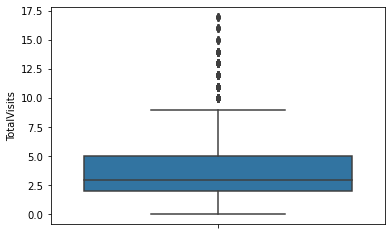

In [52]:
#Outlier Treatment: Removing top & bottom 1% of the Column Outlier values


Q3 = Lead_df.TotalVisits.quantile(0.99)
Lead_df = Lead_df[(Lead_df.TotalVisits <= Q3)]
Q1 = Lead_df.TotalVisits.quantile(0.01)
Lead_df = Lead_df[(Lead_df.TotalVisits >= Q1)]
sns.boxplot(y=Lead_df['TotalVisits'])
plt.show()

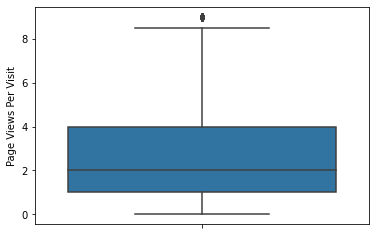

In [53]:
Q3 = Lead_df['Page Views Per Visit'].quantile(0.99)
Lead_df = Lead_df[(Lead_df['Page Views Per Visit']<= Q3)]
Q1 = Lead_df['Page Views Per Visit'].quantile(0.01)
Lead_df = Lead_df[(Lead_df['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=Lead_df['Page Views Per Visit'])
plt.show()

## 5.4 Bivariate Analysis of categorical columns

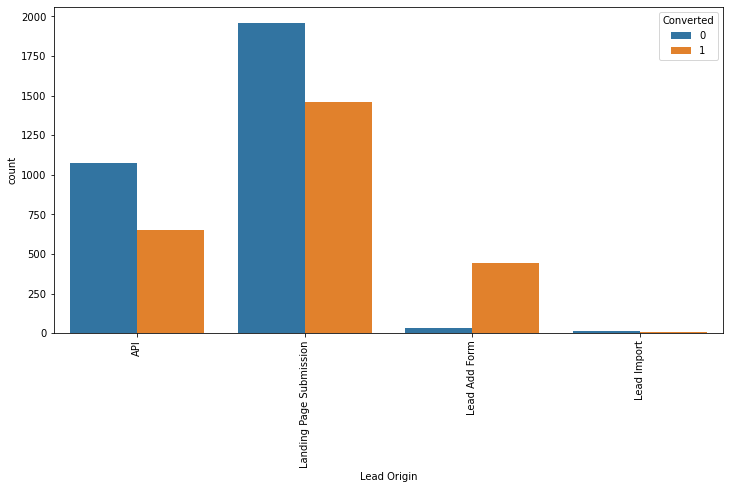

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(Lead_df['Lead Origin'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

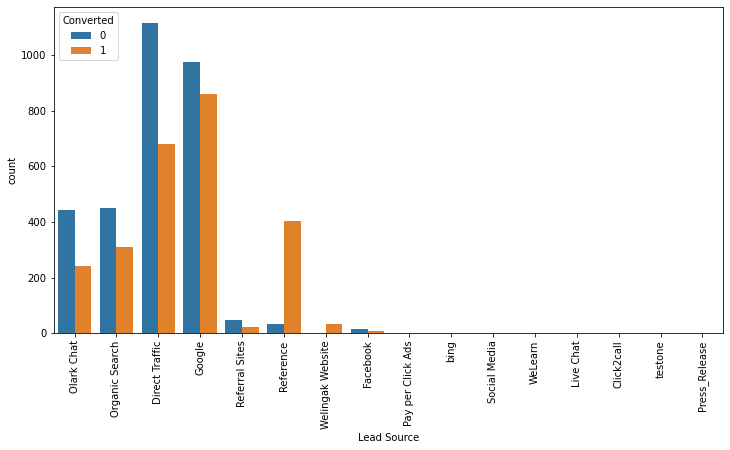

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(Lead_df['Lead Source'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

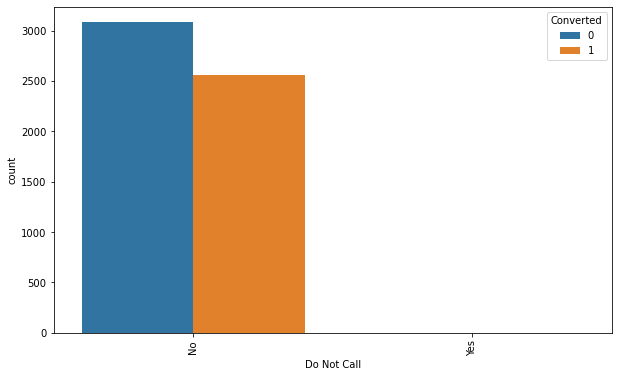

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(Lead_df['Do Not Call'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

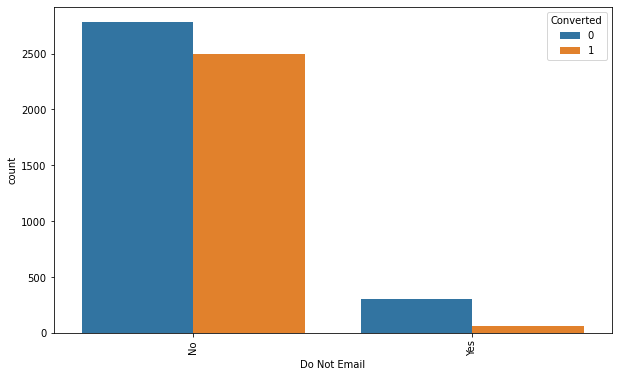

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(Lead_df['Do Not Email'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

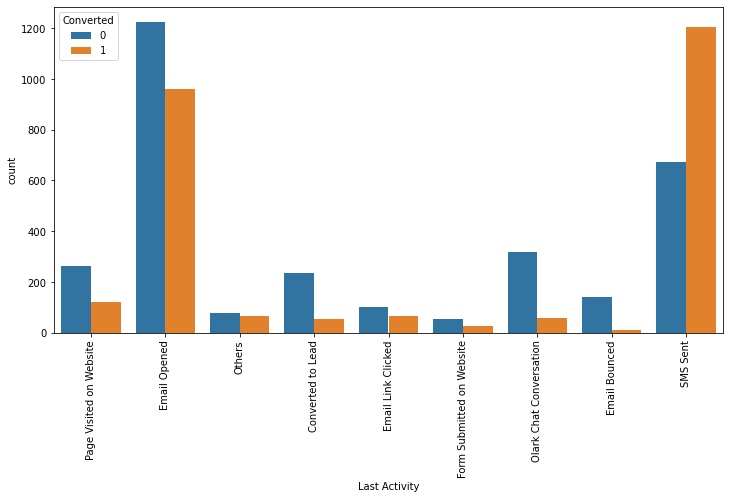

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(Lead_df['Last Activity'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

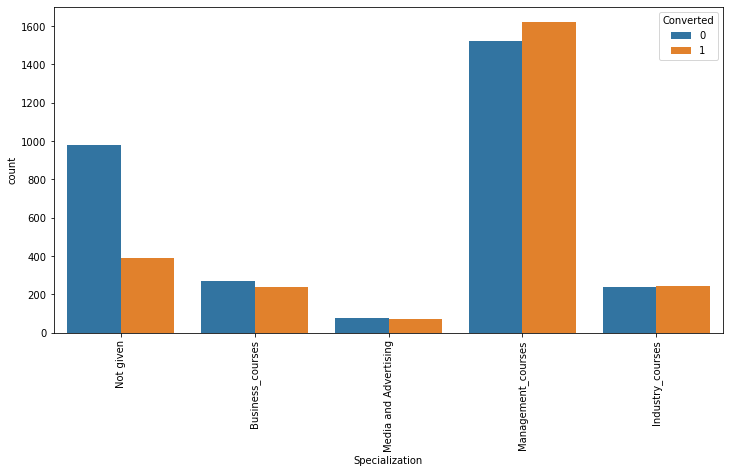

In [59]:

plt.figure(figsize=(12,6))
sns.countplot(Lead_df['Specialization'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

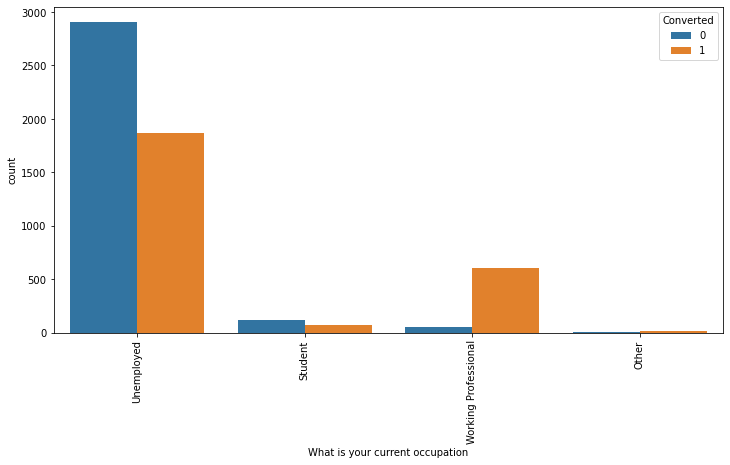

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(Lead_df['What is your current occupation'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

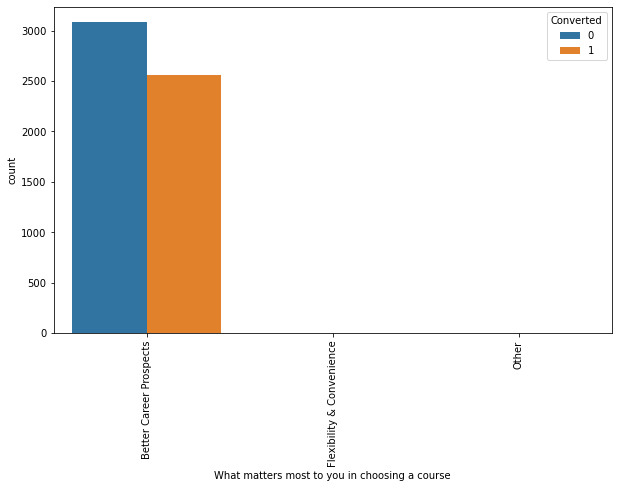

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(Lead_df['What matters most to you in choosing a course'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

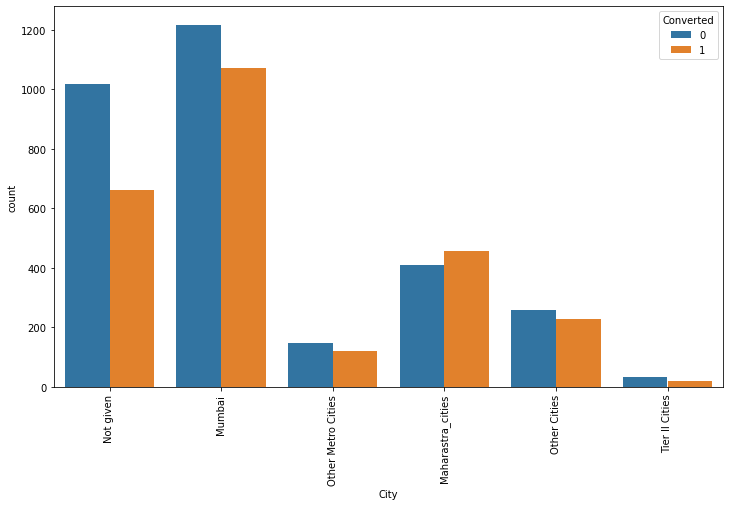

In [62]:
plt.figure(figsize=(12,7))
sns.countplot(Lead_df['City'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

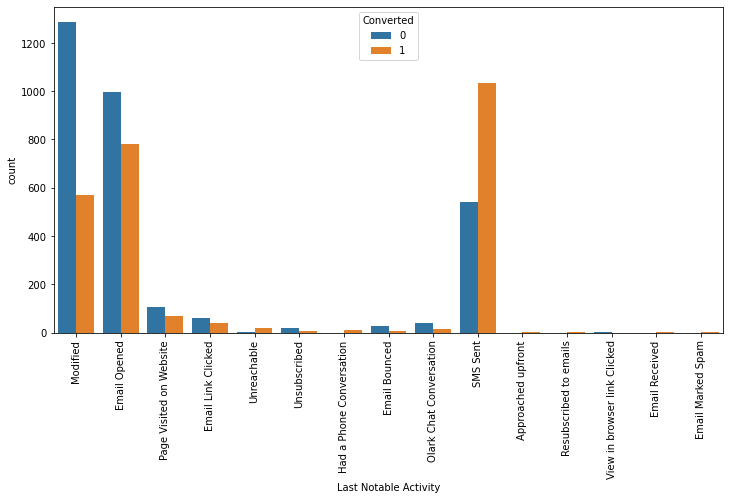

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(Lead_df['Last Notable Activity'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

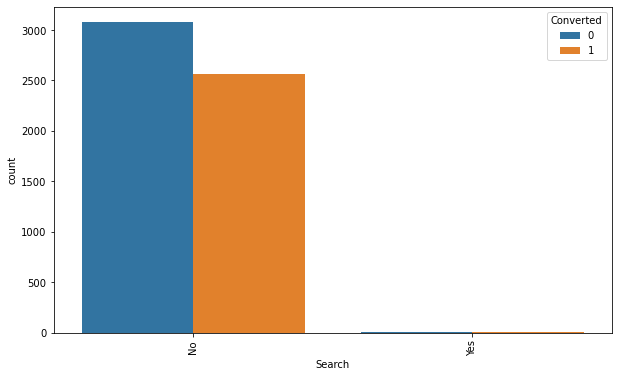

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(Lead_df['Search'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

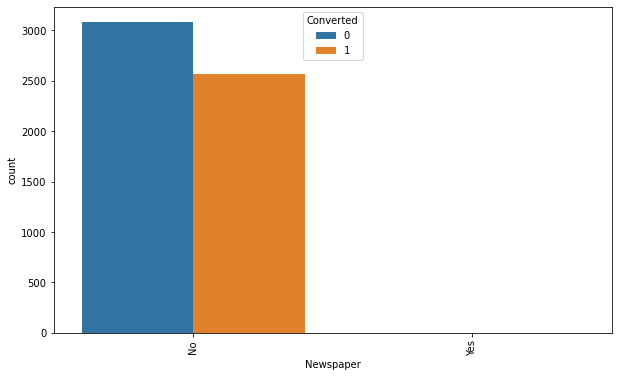

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(Lead_df['Newspaper'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

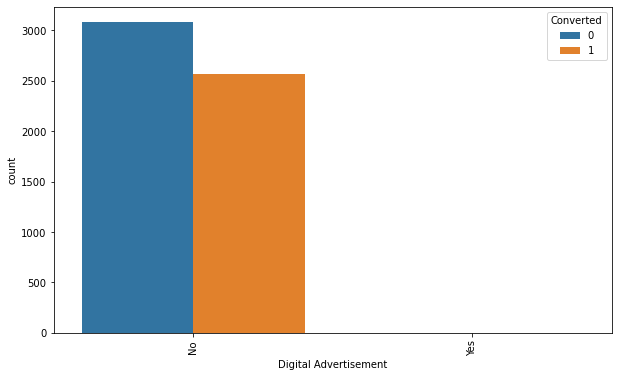

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(Lead_df['Digital Advertisement'],hue=Lead_df.Converted)
plt.xticks(rotation=90)
plt.show()

**Inference:**
1. landed on the page submission and API will mostly get converted.
2. **leads** are from **GOOGLE,direct traffic ,Olark Chat,organic engines and through reference** gets converted.
3. People who have **Opened email and sent sms** mostly gets converted.
4. **Management courses specialization and not mentioned** anything mostly gets converted..
5. **Unemployed & working professional** will get converted.
6. People who wants a **Better Career Prospects will choose a course**.
7. Most people have not mentioned their  **City, Mumbai and other mahatrastra_cities** will take a course.
8. People who has done **Last Notable Activity- Modified, email opened and sms sent** will get converted.
9. who said **no** to **Search, newspaper, digital advertisement** will get converted.
10.who said **no** to **Do not email or calls** will get converted.

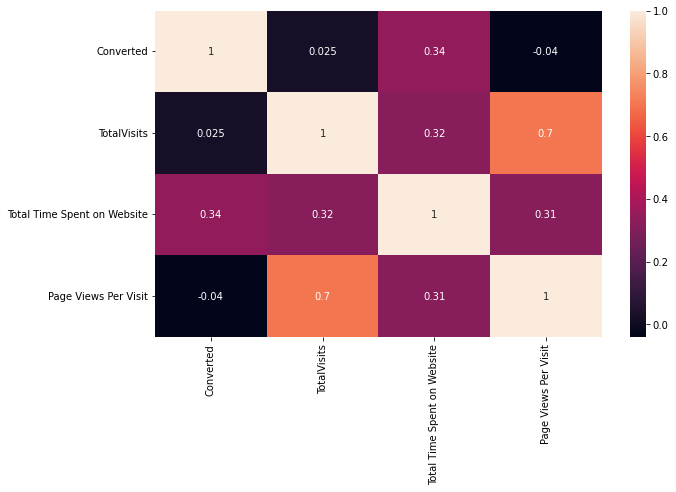

In [67]:
# co-realtion between numerical columns.

plt.figure(figsize=(10,6))
sns.heatmap(Lead_df.corr(),annot=True)
plt.show()

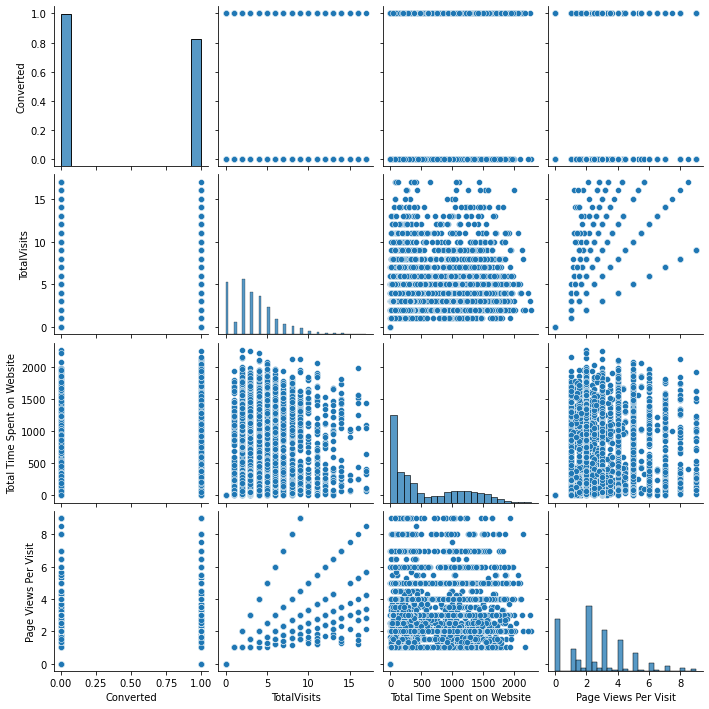

In [68]:
# Visual co-realtion between numerical columns.

sns.pairplot(Lead_df[con_cols])
plt.show()

 - TotalVisits and Page Views Per Visit seems to have some corelation.

## 5.5 Bivariate Analysis of Numerical Variables with Converted column.

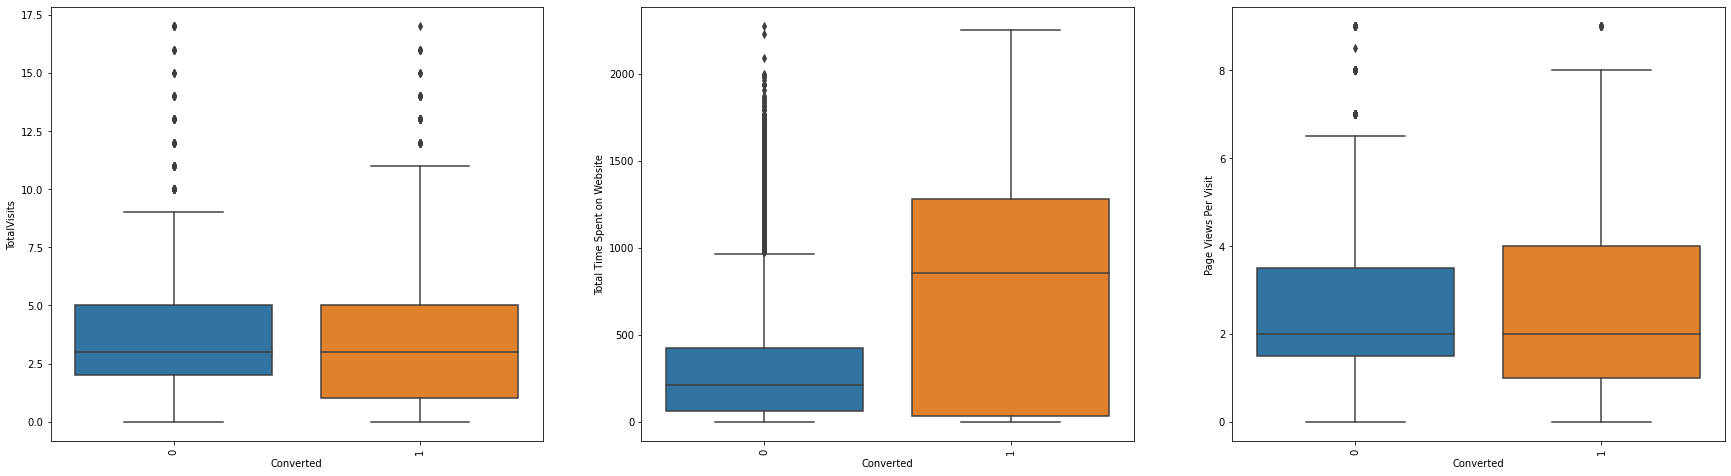

In [69]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
sns.boxplot(data=Lead_df,x='Converted',y='TotalVisits')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.boxplot(data=Lead_df,x='Converted',y='Total Time Spent on Website')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot(data=Lead_df,x='Converted',y='Page Views Per Visit')
plt.xticks(rotation=90)

plt.show()

 **Inference:**
1. Median of **TotalVisits** - converted and non converted leads is almost same. Can't say anything on the basis of median.
2. Leads who **spends more time on website** will likely to get converted so, company should engage their customers on website nby making it more interesting.
3. Median of **Pages views per visit** - converted and non converted leads is almost same. Can't say anything on the basis of median.

# 6. Data Preparation

## 6.1  Dummy variables

In [70]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5646 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    5646 non-null   object 
 1   Lead Source                                    5646 non-null   object 
 2   Do Not Email                                   5646 non-null   object 
 3   Do Not Call                                    5646 non-null   object 
 4   Converted                                      5646 non-null   int64  
 5   TotalVisits                                    5646 non-null   float64
 6   Total Time Spent on Website                    5646 non-null   int64  
 7   Page Views Per Visit                           5646 non-null   float64
 8   Last Activity                                  5646 non-null   object 
 9   Specialization                                 5646 

In [71]:
#dropping columns which doesnt seems to require for modelling.

cols_to_drop=['Search','Newspaper','Newspaper Article','Digital Advertisement','X Education Forums','Through Recommendations','Receive More Updates About Our Courses']

Lead_df.drop(cols_to_drop, axis=1, inplace=True)


In [72]:
Lead_df.shape

(5646, 16)

In [73]:
cat_cols= Lead_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [74]:
#converting into binary variables

Varlist=['A free copy of Mastering The Interview', 'Do Not Email','Do Not Call']

#definig map function

def binary_map(x):
    return x.map({'Yes':1,'No':0})

#applying the function the cols

Lead_df[Varlist] = Lead_df[Varlist].apply(binary_map)


In [75]:
Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not given,Unemployed,Better Career Prospects,Interested in other courses,Not given,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not given,Unemployed,Better Career Prospects,Ringing,Not given,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business_courses,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not given,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified


In [76]:
Lo=pd.get_dummies(Lead_df['Lead Origin'],prefix='Lead_Origin')
Ls=pd.get_dummies(Lead_df['Lead Source'],prefix="Lead_Source")
La=pd.get_dummies(Lead_df['Last Activity'],prefix="Last_Activity")
Sp=pd.get_dummies(Lead_df['Specialization'],prefix="Specialization")
Oc=pd.get_dummies(Lead_df['What is your current occupation'],prefix="Occu")
C=pd.get_dummies(Lead_df['What matters most to you in choosing a course'],prefix="Course")
LNA=pd.get_dummies(Lead_df['Last Notable Activity'],prefix= "Last_Notable_Activity")
CT=pd.get_dummies(Lead_df['City'],prefix= "City")


Lead_df=pd.concat([Lo,Ls,La,Sp,Oc,C,LNA,CT,Lead_df],axis=1)


In [77]:
# drop original columns

Lead_df.drop(cat_cols,axis=1,inplace=True)

In [78]:
Lead_df.shape

(5646, 66)

## 6.2 Train-Test Split

In [79]:
X=Lead_df.drop(['Converted'],axis=1)
y=Lead_df['Converted']

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [81]:
#scaling numerical variables

scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,...,Course_Other,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,City_Maharastra_cities,City_Mumbai,City_Not given,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2366,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.915370,-0.093324,1.090739
1625,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.141571,1.698744,0.285767
7288,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,-1.170041,-0.966246,-1.324178
2220,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.484394,-0.171549,-0.250882
7417,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.484394,1.880084,-0.250882


In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3952 entries, 2366 to 9233
Data columns (total 65 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead_Origin_API                                     3952 non-null   uint8  
 1   Lead_Origin_Landing Page Submission                 3952 non-null   uint8  
 2   Lead_Origin_Lead Add Form                           3952 non-null   uint8  
 3   Lead_Origin_Lead Import                             3952 non-null   uint8  
 4   Lead_Source_Click2call                              3952 non-null   uint8  
 5   Lead_Source_Direct Traffic                          3952 non-null   uint8  
 6   Lead_Source_Facebook                                3952 non-null   uint8  
 7   Lead_Source_Google                                  3952 non-null   uint8  
 8   Lead_Source_Live Chat                               3952 non-null   uint8  

## 6.3 Recursive Feature Elimination(RFE)

In [83]:
logreg=LogisticRegression()

In [84]:
rfe=RFE(logreg,15)     #going with 15 variables.
rfe=rfe.fit(X_train,y_train)

In [85]:
rfe.support_

array([False,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False])

In [86]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead_Origin_API', False, 18),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 39),
 ('Lead_Source_Click2call', False, 8),
 ('Lead_Source_Direct Traffic', False, 13),
 ('Lead_Source_Facebook', False, 17),
 ('Lead_Source_Google', False, 16),
 ('Lead_Source_Live Chat', False, 34),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 15),
 ('Lead_Source_Pay per Click Ads', False, 26),
 ('Lead_Source_Press_Release', False, 50),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 14),
 ('Lead_Source_Social Media', False, 4),
 ('Lead_Source_WeLearn', False, 27),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_bing', False, 25),
 ('Lead_Source_testone', False, 33),
 ('Last_Activity_Converted to Lead', False, 11),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 9),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_A

In [87]:
rfe_cols=X_train.columns[rfe.support_]
rfe_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Reference',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Others',
       'Last_Activity_SMS Sent', 'Specialization_Not given',
       'Occu_Working Professional',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Unreachable', 'City_Not given',
       'Total Time Spent on Website'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]  #columns which did not get selected

Index(['Lead_Origin_API', 'Lead_Origin_Lead Import', 'Lead_Source_Click2call',
       'Lead_Source_Direct Traffic', 'Lead_Source_Facebook',
       'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Referral Sites',
       'Lead_Source_Social Media', 'Lead_Source_WeLearn', 'Lead_Source_bing',
       'Lead_Source_testone', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Link Clicked',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website',
       'Specialization_Business_courses', 'Specialization_Industry_courses',
       'Specialization_Management_courses',
       'Specialization_Media and Advertising', 'Occu_Other', 'Occu_Student',
       'Occu_Unemployed', 'Course_Better Career Prospects',
       'Course_Flexibility & Convenience', 'Course_Other',
       'Last_Notable_

# 7. Model Building

### Model 1

In [89]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3936
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1741.3
Date:                Tue, 12 Jul 2022   Deviance:                       3482.6
Time:                        15:14:40   Pearson chi2:                 4.58e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6902      0.179     -3.845      0.000      -1.042      -0.338
Lead_Origin_Landing Page Submission               -1.0466      0.162     -6.446      0.000      -1.365      -0.728
Lead_Origin_Lead Add Form                          1.9324      1.262      1.531      0.126      -0.542       4.406
Lead_Source_Olark Chat                             1.3989      0.168      8.335      0.000       1.070       1.728
Lead_Source_Reference                              1.7456      1.280      1.364      0.173      -0.763       4.254
Lead_Source_Welingak Website                      23.3797   1.34e+04      0.002      0.999   -2.62e+04    2.62e+04
Last_Activity_Email Bounced                       -0.8577      0.386     -2.219      0.026      -1.615      -0.100
Last_Activity_Email Opened                         0.8975      0.119      7.548      0.000       0.664       1.131
Last_Activity_Others                               0.7009      0.325      2.157      0.031       0.064       1.338
Last_Activity_SMS Sent                             1.6592      0.124     13.434      0.000       1.417       1.901
Specialization_Not given                          -0.8329      0.181     -4.608      0.000      -1.187      -0.479
Occu_Working Professional                          2.6786      0.202     13.277      0.000       2.283       3.074
Last_Notable_Activity_Had a Phone Conversation    23.7042   2.44e+04      0.001      0.999   -4.78e+04    4.79e+04
Last_Notable_Activity_Unreachable                  3.2028      1.143      2.803      0.005       0.964       5.442
City_Not given                                    -0.8941      0.187     -4.792      0.000      -1.260      -0.528
Total Time Spent on Website                        1.1323      0.050     22.802      0.000       1.035       1.230
==================================================================================================================
"""

In [90]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range (X_train[rfe_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Lead_Origin_Lead Add Form,111.14
3,Lead_Source_Reference,101.54
4,Lead_Source_Welingak Website,10.34
13,City_Not given,4.23
9,Specialization_Not given,3.70
0,Lead_Origin_Landing Page Submission,2.77
8,Last_Activity_SMS Sent,2.28
6,Last_Activity_Email Opened,2.25
2,Lead_Source_Olark Chat,1.60
7,Last_Activity_Others,1.38


 - As, we can see,p-values and VIF are higher of many columns,  so will first drop 'Lead_Origin_Lead Add Form'.

In [91]:
rfe_cols=rfe_cols.drop('Lead_Origin_Lead Add Form')
rfe_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not given', 'Occu_Working Professional',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Unreachable', 'City_Not given',
       'Total Time Spent on Website'],
      dtype='object')

### Model 2

In [92]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3937
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1742.6
Date:                Tue, 12 Jul 2022   Deviance:                       3485.2
Time:                        15:14:54   Pearson chi2:                 4.58e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.6683      0.179     -3.734      0.000      -1.019      -0.317
Lead_Origin_Landing Page Submission               -1.0691      0.162     -6.602      0.000      -1.386      -0.752
Lead_Source_Olark Chat                             1.3825      0.167      8.257      0.000       1.054       1.711
Lead_Source_Reference                              3.6595      0.272     13.453      0.000       3.126       4.193
Lead_Source_Welingak Website                      25.2960   1.34e+04      0.002      0.998   -2.62e+04    2.62e+04
Last_Activity_Email Bounced                       -0.8558      0.386     -2.215      0.027      -1.613      -0.099
Last_Activity_Email Opened                         0.9006      0.119      7.578      0.000       0.668       1.134
Last_Activity_Others                               0.7010      0.325      2.159      0.031       0.065       1.337
Last_Activity_SMS Sent                             1.6609      0.123     13.453      0.000       1.419       1.903
Specialization_Not given                          -0.8383      0.181     -4.640      0.000      -1.192      -0.484
Occu_Working Professional                          2.6746      0.202     13.262      0.000       2.279       3.070
Last_Notable_Activity_Had a Phone Conversation    23.7017   2.44e+04      0.001      0.999   -4.78e+04    4.79e+04
Last_Notable_Activity_Unreachable                  3.1959      1.142      2.798      0.005       0.957       5.435
City_Not given                                    -0.9022      0.187     -4.836      0.000      -1.268      -0.537
Total Time Spent on Website                        1.1285      0.050     22.773      0.000       1.031       1.226
==================================================================================================================
"""

 - 'Last_Notable_Activity_Had a Phone Conversation' has the highest p value, so dropping it.

In [93]:
rfe_cols=rfe_cols.drop('Last_Notable_Activity_Had a Phone Conversation')
rfe_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not given', 'Occu_Working Professional',
       'Last_Notable_Activity_Unreachable', 'City_Not given',
       'Total Time Spent on Website'],
      dtype='object')

### Model 3

In [94]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3938
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1747.3
Date:                Tue, 12 Jul 2022   Deviance:                       3494.7
Time:                        15:15:23   Pearson chi2:                 4.59e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.6617      0.179     -3.705      0.000      -1.012      -0.312
Lead_Origin_Landing Page Submission    -1.0749      0.161     -6.662      0.000      -1.391      -0.759
Lead_Source_Olark Chat                  1.3798      0.167      8.246      0.000       1.052       1.708
Lead_Source_Reference                   3.6576      0.272     13.447      0.000       3.124       4.191
Lead_Source_Welingak Website           25.2952   1.33e+04      0.002      0.998   -2.61e+04    2.62e+04
Last_Activity_Email Bounced            -0.8556      0.386     -2.214      0.027      -1.613      -0.098
Last_Activity_Email Opened              0.9002      0.119      7.573      0.000       0.667       1.133
Last_Activity_Others                    0.9448      0.302      3.128      0.002       0.353       1.537
Last_Activity_SMS Sent                  1.6609      0.123     13.451      0.000       1.419       1.903
Specialization_Not given               -0.8416      0.181     -4.661      0.000      -1.196      -0.488
Occu_Working Professional               2.6731      0.202     13.252      0.000       2.278       3.068
Last_Notable_Activity_Unreachable       2.9509      1.136      2.597      0.009       0.724       5.178
City_Not given                         -0.9073      0.186     -4.867      0.000      -1.273      -0.542
Total Time Spent on Website             1.1285      0.049     22.799      0.000       1.031       1.226
=======================================================================================================
"""

In [95]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range (X_train[rfe_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,City_Not given,4.23
8,Specialization_Not given,3.70
0,Lead_Origin_Landing Page Submission,2.76
7,Last_Activity_SMS Sent,2.27
5,Last_Activity_Email Opened,2.24
1,Lead_Source_Olark Chat,1.60
2,Lead_Source_Reference,1.49
9,Occu_Working Professional,1.32
6,Last_Activity_Others,1.26
12,Total Time Spent on Website,1.25


 - 'Lead_Source_Welingak Website' has the highest p-value, so dropping it

In [96]:
rfe_cols=rfe_cols.drop('Lead_Source_Welingak Website')
rfe_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Others',
       'Last_Activity_SMS Sent', 'Specialization_Not given',
       'Occu_Working Professional', 'Last_Notable_Activity_Unreachable',
       'City_Not given', 'Total Time Spent on Website'],
      dtype='object')

### Model 4

In [97]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3939
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1792.6
Date:                Tue, 12 Jul 2022   Deviance:                       3585.2
Time:                        15:16:18   Pearson chi2:                 4.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4589      0.174     -2.639      0.008      -0.800      -0.118
Lead_Origin_Landing Page Submission    -1.2710      0.158     -8.060      0.000      -1.580      -0.962
Lead_Source_Olark Chat                  1.1154      0.162      6.903      0.000       0.799       1.432
Lead_Source_Reference                   3.4018      0.269     12.644      0.000       2.875       3.929
Last_Activity_Email Bounced            -0.8588      0.383     -2.243      0.025      -1.609      -0.108
Last_Activity_Email Opened              0.9093      0.117      7.766      0.000       0.680       1.139
Last_Activity_Others                    0.9204      0.299      3.083      0.002       0.335       1.506
Last_Activity_SMS Sent                  1.6774      0.122     13.784      0.000       1.439       1.916
Specialization_Not given               -0.7640      0.177     -4.305      0.000      -1.112      -0.416
Occu_Working Professional               2.6325      0.200     13.132      0.000       2.240       3.025
Last_Notable_Activity_Unreachable       2.8695      1.128      2.545      0.011       0.659       5.080
City_Not given                         -0.9710      0.183     -5.307      0.000      -1.330      -0.612
Total Time Spent on Website             1.0758      0.048     22.235      0.000       0.981       1.171
=======================================================================================================
"""

 - 'Last_Activity_Email Bounced' has the highest p-value, dropping it.

In [98]:
rfe_cols=rfe_cols.drop('Last_Activity_Email Bounced')
rfe_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not given', 'Occu_Working Professional',
       'Last_Notable_Activity_Unreachable', 'City_Not given',
       'Total Time Spent on Website'],
      dtype='object')

### Model 5

In [99]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3940
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1795.5
Date:                Tue, 12 Jul 2022   Deviance:                       3591.1
Time:                        15:16:52   Pearson chi2:                 4.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.5173      0.173     -2.998      0.003      -0.856      -0.179
Lead_Origin_Landing Page Submission    -1.2899      0.158     -8.186      0.000      -1.599      -0.981
Lead_Source_Olark Chat                  1.1213      0.162      6.931      0.000       0.804       1.438
Lead_Source_Reference                   3.4085      0.269     12.655      0.000       2.881       3.936
Last_Activity_Email Opened              0.9819      0.114      8.623      0.000       0.759       1.205
Last_Activity_Others                    0.9949      0.297      3.345      0.001       0.412       1.578
Last_Activity_SMS Sent                  1.7514      0.118     14.780      0.000       1.519       1.984
Specialization_Not given               -0.7669      0.177     -4.326      0.000      -1.114      -0.419
Occu_Working Professional               2.6399      0.200     13.173      0.000       2.247       3.033
Last_Notable_Activity_Unreachable       2.8675      1.128      2.542      0.011       0.657       5.078
City_Not given                         -0.9820      0.183     -5.368      0.000      -1.340      -0.623
Total Time Spent on Website             1.0778      0.048     22.299      0.000       0.983       1.173
=======================================================================================================
"""

In [100]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range (X_train[rfe_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,City_Not given,4.20
6,Specialization_Not given,3.67
0,Lead_Origin_Landing Page Submission,2.49
5,Last_Activity_SMS Sent,2.14
3,Last_Activity_Email Opened,2.10
1,Lead_Source_Olark Chat,1.58
2,Lead_Source_Reference,1.47
7,Occu_Working Professional,1.32
4,Last_Activity_Others,1.25
10,Total Time Spent on Website,1.25


 - 'City_Not given' has the highest VIF, so dropping it though its under **5** but I want to see if we can take it under 3.

In [101]:
rfe_cols=rfe_cols.drop('City_Not given')
rfe_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not given', 'Occu_Working Professional',
       'Last_Notable_Activity_Unreachable', 'Total Time Spent on Website'],
      dtype='object')

### Model 6

In [102]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3941
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1810.0
Date:                Tue, 12 Jul 2022   Deviance:                       3620.0
Time:                        15:17:05   Pearson chi2:                 4.39e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.8457      0.159     -5.334      0.000      -1.156      -0.535
Lead_Origin_Landing Page Submission    -0.9829      0.144     -6.809      0.000      -1.266      -0.700
Lead_Source_Olark Chat                  1.0697      0.160      6.700      0.000       0.757       1.383
Lead_Source_Reference                   3.3480      0.268     12.515      0.000       2.824       3.872
Last_Activity_Email Opened              1.0240      0.113      9.076      0.000       0.803       1.245
Last_Activity_Others                    1.0137      0.296      3.422      0.001       0.433       1.594
Last_Activity_SMS Sent                  1.7405      0.118     14.773      0.000       1.510       1.971
Specialization_Not given               -1.3232      0.147     -9.031      0.000      -1.610      -1.036
Occu_Working Professional               2.5832      0.202     12.797      0.000       2.188       2.979
Last_Notable_Activity_Unreachable       2.9061      1.119      2.597      0.009       0.713       5.099
Total Time Spent on Website             1.0727      0.048     22.314      0.000       0.978       1.167
=======================================================================================================
"""

In [103]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range (X_train[rfe_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Lead_Origin_Landing Page Submission,2.43
3,Last_Activity_Email Opened,2.08
5,Last_Activity_SMS Sent,2.06
6,Specialization_Not given,1.63
1,Lead_Source_Olark Chat,1.54
2,Lead_Source_Reference,1.40
4,Last_Activity_Others,1.25
9,Total Time Spent on Website,1.25
7,Occu_Working Professional,1.24
8,Last_Notable_Activity_Unreachable,1.19


 - 'Last_Notable_Activity_Unreachable' has the p-value of 0.009. lets drop it.

In [104]:
rfe_cols=rfe_cols.drop('Last_Notable_Activity_Unreachable')
rfe_cols

Index(['Lead_Origin_Landing Page Submission', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Email Opened',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Specialization_Not given', 'Occu_Working Professional',
       'Total Time Spent on Website'],
      dtype='object')

## Model 7

In [105]:
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3952
Model:                            GLM   Df Residuals:                     3942
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1815.5
Date:                Tue, 12 Jul 2022   Deviance:                       3631.1
Time:                        15:17:35   Pearson chi2:                 4.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.8283      0.158     -5.237      0.000      -1.138      -0.518
Lead_Origin_Landing Page Submission    -1.0031      0.144     -6.969      0.000      -1.285      -0.721
Lead_Source_Olark Chat                  1.0607      0.159      6.661      0.000       0.749       1.373
Lead_Source_Reference                   3.3416      0.267     12.503      0.000       2.818       3.865
Last_Activity_Email Opened              1.0243      0.113      9.076      0.000       0.803       1.245
Last_Activity_Others                    1.3530      0.267      5.062      0.000       0.829       1.877
Last_Activity_SMS Sent                  1.7413      0.118     14.777      0.000       1.510       1.972
Specialization_Not given               -1.3360      0.146     -9.141      0.000      -1.622      -1.050
Occu_Working Professional               2.5807      0.202     12.776      0.000       2.185       2.977
Total Time Spent on Website             1.0721      0.048     22.328      0.000       0.978       1.166
=======================================================================================================
"""

In [106]:
vif=pd.DataFrame()
vif['Features']=X_train[rfe_cols].columns
vif['VIF']= [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range (X_train[rfe_cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Lead_Origin_Landing Page Submission,2.43
3,Last_Activity_Email Opened,2.08
5,Last_Activity_SMS Sent,2.06
6,Specialization_Not given,1.63
1,Lead_Source_Olark Chat,1.54
2,Lead_Source_Reference,1.40
8,Total Time Spent on Website,1.25
7,Occu_Working Professional,1.24
4,Last_Activity_Others,1.06


 - values seems good, so we are stopping here and taking the **Model 7** as the final model.

In [108]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2366    0.287577
1625    0.986768
7288    0.971209
2220    0.270706
7417    0.872752
8070    0.996980
6183    0.395425
8278    0.246598
4585    0.221536
6459    0.201031
dtype: float64

In [109]:

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28757704, 0.98676755, 0.97120927, 0.27070587, 0.87275191,
       0.9969797 , 0.3954251 , 0.24659807, 0.22153591, 0.20103073])

In [110]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Prospect ID']=y_train_pred

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.287577,0.287577
1,1,0.986768,0.986768
2,1,0.971209,0.971209
3,0,0.270706,0.270706
4,0,0.872752,0.872752


In [111]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.287577,0.287577,0
1,1,0.986768,0.986768,1
2,1,0.971209,0.971209,1
3,0,0.270706,0.270706,0
4,0,0.872752,0.872752,1


In [112]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1839  308]
 [ 506 1299]]


In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7940283400809717


In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7196675900277009

In [116]:
# Let us calculate specificity
TN / float(TN+FP)


0.8565440149045179

In [117]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.14345598509548207


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.8083385189794648


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7842217484008529


## 8.  Plotting ROC Curve

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

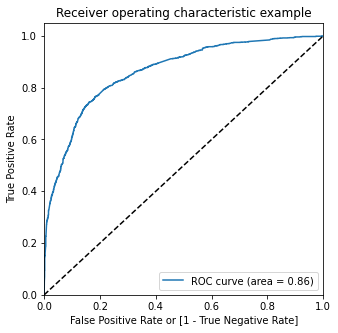

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## 8.1 Finding Optimal Cutoff Point

In [122]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.287577,0.287577,0,1,1,1,0,0,0,0,0,0,0
1,1,0.986768,0.986768,1,1,1,1,1,1,1,1,1,1,1
2,1,0.971209,0.971209,1,1,1,1,1,1,1,1,1,1,1
3,0,0.270706,0.270706,0,1,1,1,0,0,0,0,0,0,0
4,0,0.872752,0.872752,1,1,1,1,1,1,1,1,1,1,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.456731  1.000000  0.000000
0.1   0.1  0.553138  0.987258  0.188170
0.2   0.2  0.678897  0.937396  0.461574
0.3   0.3  0.759868  0.861496  0.674429
0.4   0.4  0.789474  0.791690  0.787611
0.5   0.5  0.794028  0.719668  0.856544
0.6   0.6  0.775557  0.634903  0.893805
0.7   0.7  0.749747  0.541274  0.925012
0.8   0.8  0.718370  0.431025  0.959944
0.9   0.9  0.670547  0.292521  0.988356


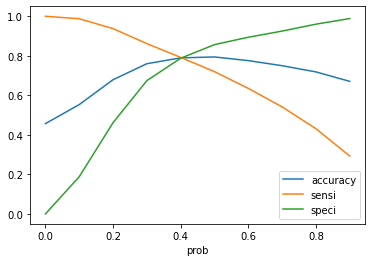

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 - From above curve we can take **0.4** is the optimal point to take it as cut-off prob.

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.287577,0.287577,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.986768,0.986768,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.971209,0.971209,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.270706,0.270706,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.872752,0.872752,1,1,1,1,1,1,1,1,1,1,0,1


In [126]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.287577,0.287577,0,29
1,1,0.986768,0.986768,1,99
2,1,0.971209,0.971209,1,97
3,0,0.270706,0.270706,0,27
4,0,0.872752,0.872752,1,87


In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7894736842105263

In [128]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1691,  456],
       [ 376, 1429]])

In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7196675900277009

In [131]:
# Let us calculate specificity
TN / float(TN+FP)


0.8565440149045179

**Observations from Train Set**:

 - Accuracy=78.9%
 - Sensitivity=71.9%
 - Specificity=85.6%

In [132]:
# other observations on train set are:

In [133]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14345598509548207


In [134]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8083385189794648


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7842217484008529


## Precision and Recall

In [136]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1839,  308],
       [ 506, 1299]])

In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
#Precision=TP/(TP+FP)
Precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
Precision


0.8083385189794648

In [139]:
#Recall=TP /(TP + FN)

Recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall

0.7196675900277009

In [140]:
from sklearn.metrics import precision_score, recall_score

In [141]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7580901856763925

In [142]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7916897506925208

In [143]:
from sklearn.metrics import precision_recall_curve

In [144]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

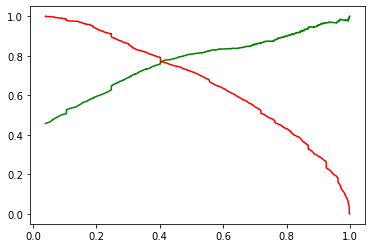

In [145]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [146]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.287577,0.287577,0,1,1,1,0,0,0,0,0,0,0,0,29
1,1,0.986768,0.986768,1,1,1,1,1,1,1,1,1,1,1,1,99
2,1,0.971209,0.971209,1,1,1,1,1,1,1,1,1,1,1,1,97
3,0,0.270706,0.270706,0,1,1,1,0,0,0,0,0,0,0,0,27
4,0,0.872752,0.872752,1,1,1,1,1,1,1,1,1,1,0,1,87


In [147]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7894736842105263

In [148]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1691,  456],
       [ 376, 1429]])

In [149]:
# Calculate Precision

TP/(TP+FP)

0.8083385189794648

In [150]:
# Calculate Recall

TP/(TP+FN)

0.7196675900277009

# Predicitons on TEST SET

In [151]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_testone,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,...,Course_Other,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked,City_Maharastra_cities,City_Mumbai,City_Not given,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1177,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.861813,-0.335103,-0.807712
8872,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.549070,-0.794339,1.283595
8537,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.312674,1.402927,1.283595
1406,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1.214534,-0.958604,-1.330539
5854,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.549070,-0.522330,1.283595


In [152]:
# Select the columns in X_train for X_test as well

X_test = X_test[rfe_cols]
X_test.head()

,Lead_Origin_Landing Page Submission,Lead_Source_Olark Chat,Lead_Source_Reference,Last_Activity_Email Opened,Last_Activity_Others,Last_Activity_SMS Sent,Specialization_Not given,Occu_Working Professional,Total Time Spent on Website
1177,1,0,0,0,0,0,0,0,-0.335103
8872,1,0,0,0,0,1,0,0,-0.794339
8537,1,0,0,1,0,0,0,0,1.402927
1406,0,0,1,1,0,0,0,0,-0.958604
5854,0,0,0,0,0,1,1,0,-0.522330


In [153]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [154]:
y_test_pred[:10]

1177    0.100592
8872    0.280563
8537    0.667503
1406    0.924830
5854    0.272316
2771    0.154911
2515    0.844529
2360    0.309382
7665    0.106093
6761    0.145252
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
# Let's see the head
y_pred_1.head()

,0
1177,0.100592
8872,0.280563
8537,0.667503
1406,0.924830
5854,0.272316


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1177,0.100592
1,0,8872,0.280563
2,0,8537,0.667503
3,1,1406,0.924830
4,1,5854,0.272316


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [163]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,1177,0.100592
1,0,8872,0.280563
2,0,8537,0.667503
3,1,1406,0.924830
4,1,5854,0.272316


In [164]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,1177,0,0.100592,10
1,8872,0,0.280563,28
2,8537,0,0.667503,67
3,1406,1,0.924830,92
4,5854,1,0.272316,27


In [166]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [167]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
0,1177,0,0.100592,10,0
1,8872,0,0.280563,28,0
2,8537,0,0.667503,67,1
3,1406,1,0.924830,92,1
4,5854,1,0.272316,27,0


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8022432113341205

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[741, 195],
       [140, 618]])

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8153034300791556

In [172]:
# Let us calculate specificity

TN / float(TN+FP)

0.7916666666666666

In [ ]:
#precision

precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

In [ ]:
#recall

recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

#### Comparison of test and train sets

**Observations on Test Set:**
 - Accuracy   = 80%
 - Sensitivity= 81.5%
 - Specificity = 79.1%

**Observations on Train Set:**
 - Accuracy=78.9%
 - Sensitivity=71.9%
 - Specificity=85.6%


- Model seems good with accuracy of 80%. We can present this to the client.